## 1. Import Libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 2. Data Load

In [79]:
data = pd.read_csv("boston_housing.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [81]:
data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

## 3. Data Visualization (Part I)

### Heat Map (Check Correlation)

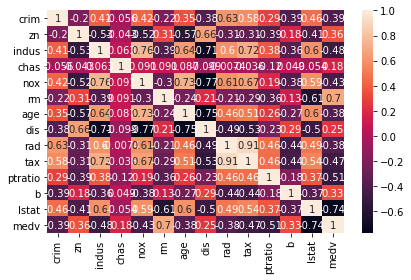

In [82]:
sns.heatmap(data=data.corr(), annot=True)

plt.tight_layout()
plt.show()

## 4. Data Preprocessing (Part I)

### Data Drop

In [83]:
data = data.drop(['zn', 'chas', 'dis', 'ptratio', 'b', 'lstat', 'age'], axis = 1)

In [84]:
data.head()

,crim,indus,nox,rm,rad,tax,medv
0,0.00632,2.31,0.538,6.575,1,296,24.0
1,0.02731,7.07,0.469,6.421,2,242,21.6
2,0.02729,7.07,0.469,7.185,2,242,34.7
3,0.03237,2.18,0.458,6.998,3,222,33.4
4,0.06905,2.18,0.458,7.147,3,222,36.2


## 5. Data Visualization (Part II)

### Heat Map (Check Correlation)

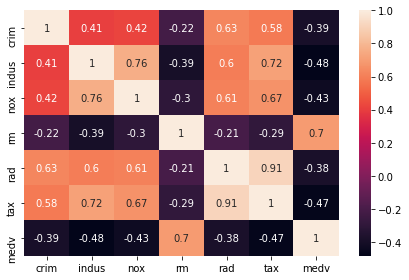

In [85]:
sns.heatmap(data=data.corr(), annot=True)

plt.tight_layout()
plt.show()

### Displot (Check Distribution)

[]

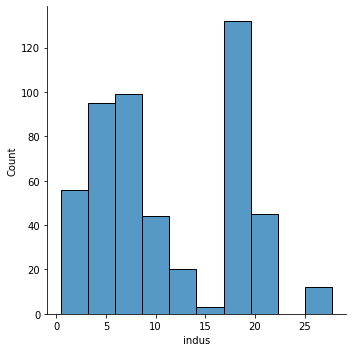

In [138]:
sns.displot(data['indus'])
plt.plot()

[]

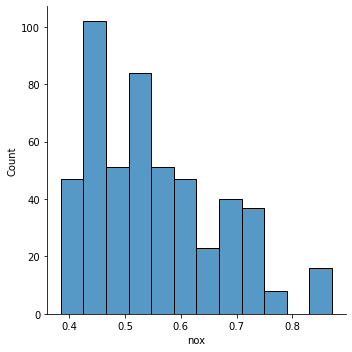

In [139]:
sns.displot(data['nox'])
plt.plot()

[]

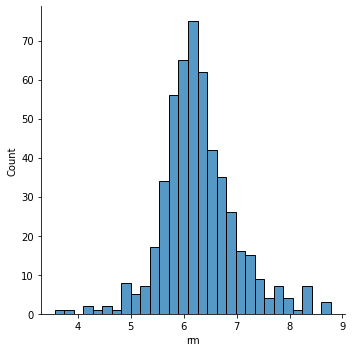

In [140]:
sns.displot(data['rm'])
plt.plot()

[]

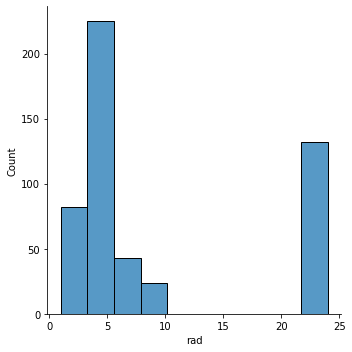

In [141]:
sns.displot(data['rad'])
plt.plot()

[]

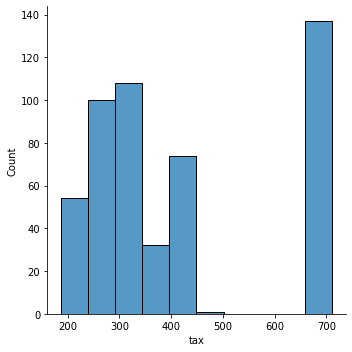

In [142]:
sns.displot(data['tax'])
plt.plot()

[]

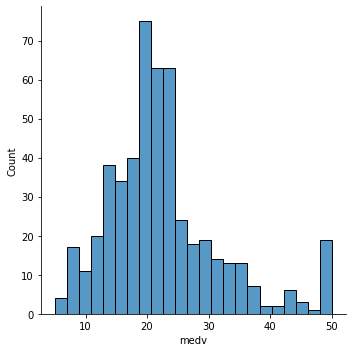

In [143]:
sns.displot(data['medv'])
plt.plot()

## 6. Data Preprocessing (Part II)

### Data Transformation

#### Min-Max Scaler

In [86]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
mms = MinMaxScaler()

In [150]:
data_fix['medv'] = mms.fit_transform(data[['medv']].to_numpy().reshape(-1, 1))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [133]:
data_fix['crim'] = mms.fit_transform(data[['crim']])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Where did it goes wrong?

## 7. Data Visualization (Part III)

### Scatter Plot (Check Correlation-Distribution)

<AxesSubplot:xlabel='rad', ylabel='tax'>

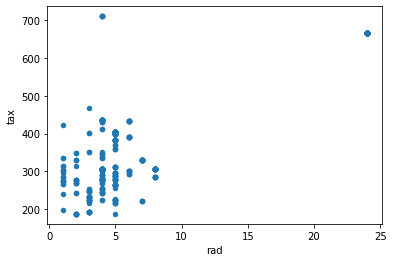

In [144]:
data.plot.scatter(x='rad', y='tax')

<AxesSubplot:xlabel='rm', ylabel='medv'>

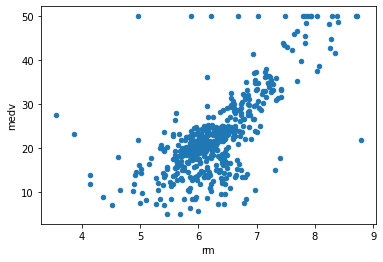

In [145]:
data.plot.scatter(x='rm', y='medv')

## 7. Linear Regression

### Train and Test Data

In [146]:
from sklearn.model_selection import train_test_split

In [152]:
dataset = data.drop(['crim', 'indus', 'nox', 'rad', 'tax'], axis = 1)
dataset.head()

,rm,medv
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [153]:
train_data, test_data = train_test_split(dataset, test_size=0.2)

In [154]:
train_data.head()

,rm,medv
44,6.069,21.2
338,6.059,20.6
154,6.129,17.0
84,6.389,23.9
93,6.211,25.0


In [155]:
test_data.head()

,rm,medv
224,8.266,44.8
284,7.088,32.2
290,6.861,28.5
364,8.780,21.9
46,5.786,20.0


### Dependent and Indpendent Data

In [156]:
train_label = train_data['medv']

In [157]:
train_features = train_data.drop(['medv'], axis=1)

In [158]:
test_label = test_data['medv']

In [159]:
test_features = test_data.drop(['medv'], axis=1)

### Run The Model

In [160]:
from sklearn.linear_model import LinearRegression

In [161]:
lr_model = LinearRegression()

In [162]:
lr_model.fit(X=train_features, y=train_label)

LinearRegression()

In [163]:
medv_pred = lr_model.predict(test_features)

In [166]:
accuracy_score = lr_model.score(test_features, test_label)
print('Accuracy: {}'.format(accuracy_score*100.2))

Accuracy: 54.58924742000303


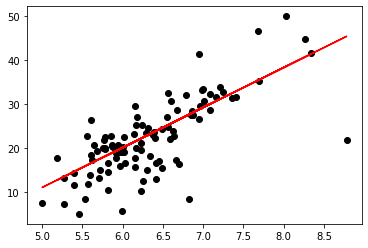

In [168]:
plt.scatter(test_data['rm'], test_data['medv'], color='black')
plt.plot(test_data['rm'], medv_pred, color = 'red')

In [169]:
print('Coeffiecient', lr_model.coef_[0])
print('Intercept', lr_model.intercept_)

Coeffiecient 9.098557715192298
Intercept -34.46759843949974


Model: y = 9.098557715192298x - 34.46759843949974